# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 10 submission</b></u>

### Roster Name: David Wang
### Student ID: 012368967
### Email address: davidwangdn@gmail.com


##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend

#### Code the solution

In [28]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [29]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [17]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # decoder layers of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 784)               1011

In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 2s 68ms/step - loss: 0.6469 - val_loss: 0.4743
Epoch 2/30
24/24 [==============================] - 1s 61ms/step - loss: 0.4458 - val_loss: 0.3943
Epoch 3/30
24/24 [==============================] - 1s 54ms/step - loss: 0.3845 - val_loss: 0.3673
Epoch 4/30
24/24 [==============================] - 1s 48ms/step - loss: 0.3620 - val_loss: 0.3522
Epoch 5/30
24/24 [==============================] - 1s 46ms/step - loss: 0.3478 - val_loss: 0.3371
Epoch 6/30
24/24 [==============================] - 1s 51ms/step - loss: 0.3318 - val_loss: 0.3285
Epoch 7/30
24/24 [==============================] - 2s 68ms/step - loss: 0.3240 - val_loss: 0.3216
Epoch 8/30
24/24 [==============================] - 2s 70ms/step - loss: 0.3183 - val_loss: 0.3186
Epoch 9/30
24/24 [==============================] - 2s 72ms/step - loss: 0.3154 - val_loss: 0.3156
Epoch 10/30
24/24 [==============================] - 1s 56ms/step - loss: 0.3127 - val_loss: 0.3144
Epoch 11/

In [21]:
from tensorflow.keras.callbacks import TensorBoard

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = "/tmp/autoencoder",
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation),
                callbacks = [tboard_callback])

#[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=True)]
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir=/tmp/autoencoder

# can also run this in the terminal window:
# tensorboard --logdir=/tmp/autoencoder
# and go to http://localhost:6006/#scalars&run=train

Epoch 1/30
24/24 [==============================] - 2s 63ms/step - loss: 0.2962 - val_loss: 0.2962
Epoch 2/30
24/24 [==============================] - 1s 62ms/step - loss: 0.2962 - val_loss: 0.2957
Epoch 3/30
24/24 [==============================] - 1s 58ms/step - loss: 0.2952 - val_loss: 0.2950
Epoch 4/30
24/24 [==============================] - 1s 47ms/step - loss: 0.2951 - val_loss: 0.2947
Epoch 5/30
24/24 [==============================] - 1s 49ms/step - loss: 0.2945 - val_loss: 0.2942
Epoch 6/30
24/24 [==============================] - 1s 48ms/step - loss: 0.2942 - val_loss: 0.2940
Epoch 7/30
24/24 [==============================] - 1s 49ms/step - loss: 0.2939 - val_loss: 0.2934
Epoch 8/30
24/24 [==============================] - 1s 47ms/step - loss: 0.2932 - val_loss: 0.2931
Epoch 9/30
24/24 [==============================] - 1s 47ms/step - loss: 0.2930 - val_loss: 0.2974
Epoch 10/30
24/24 [==============================] - 1s 50ms/step - loss: 0.2943 - val_loss: 0.2926
Epoch 11/

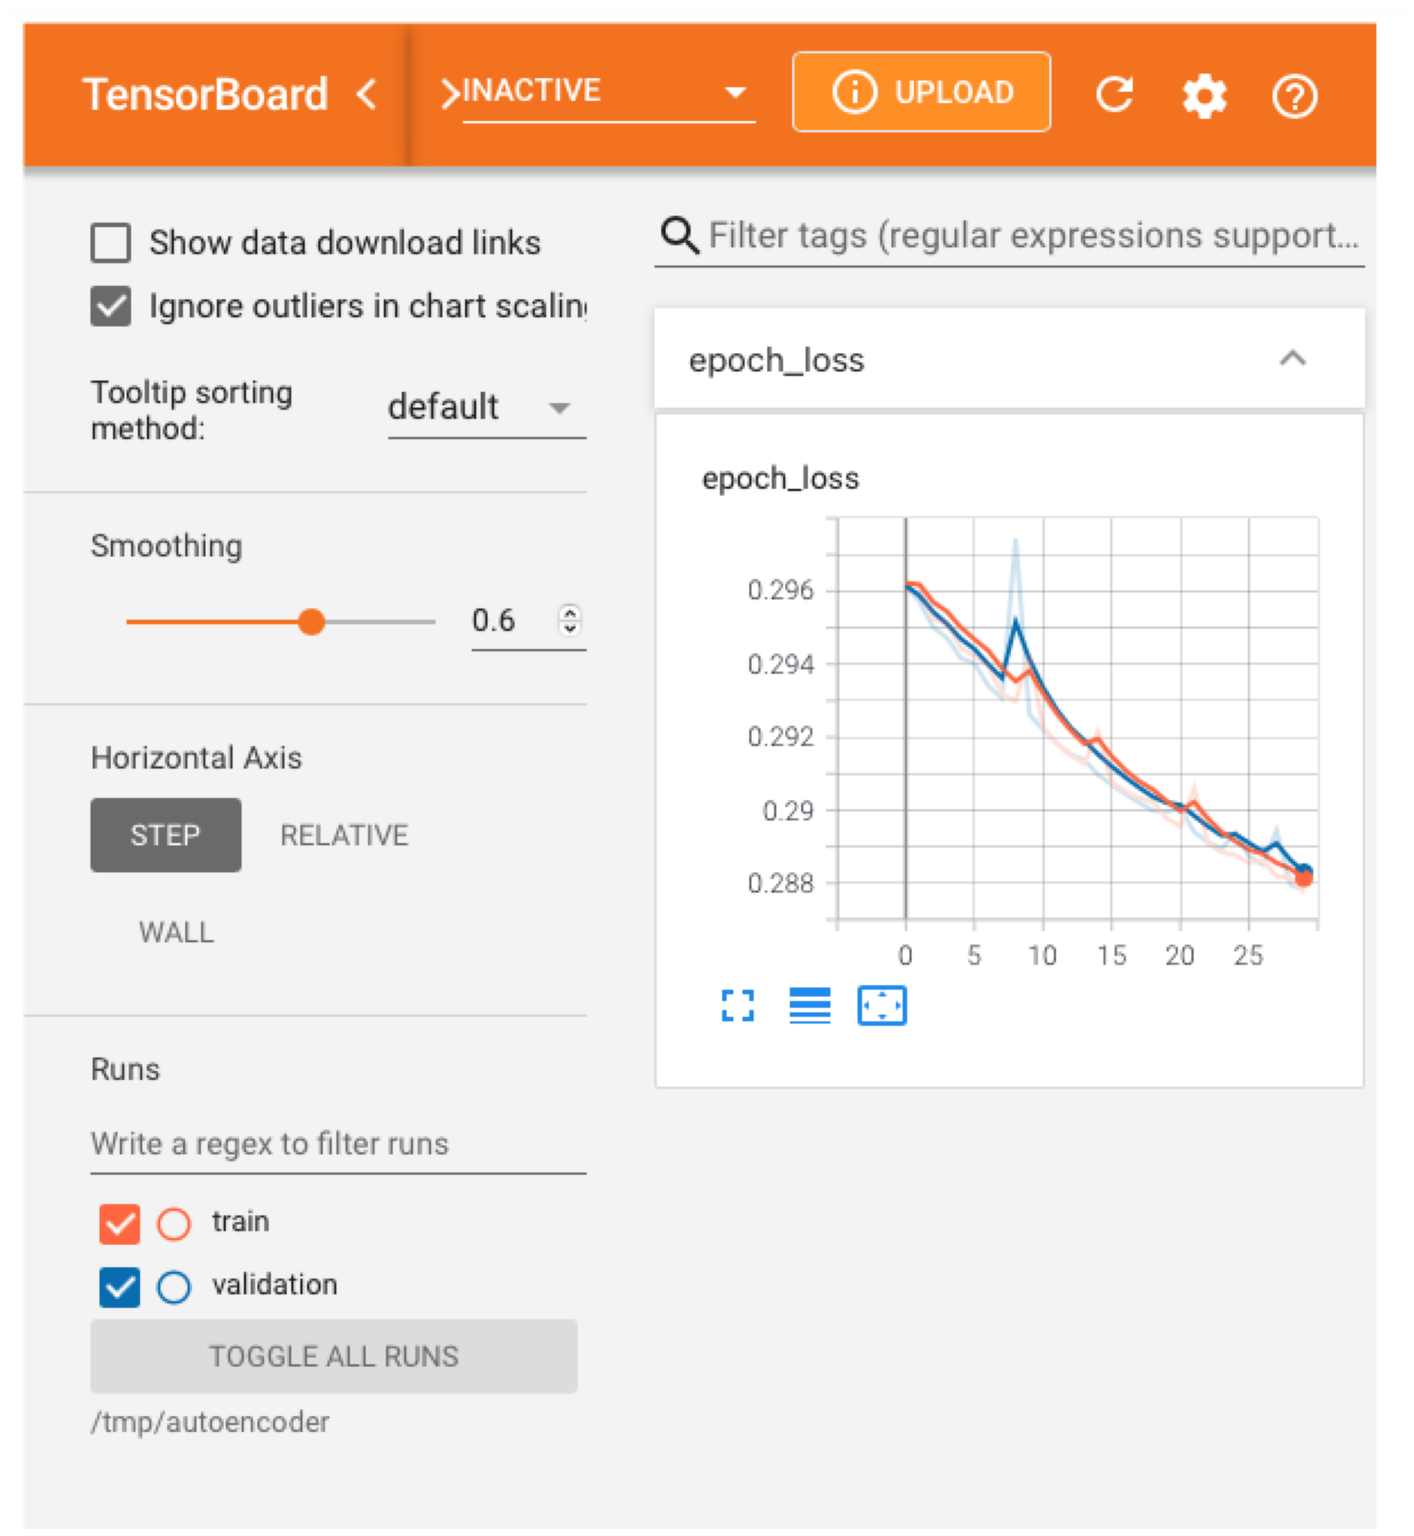

In [46]:
from skimage import io
img = io.imread('Tfboard.png')

plt.figure(figsize=(28, 28))
plt.axis("off")
plt.imshow(img)

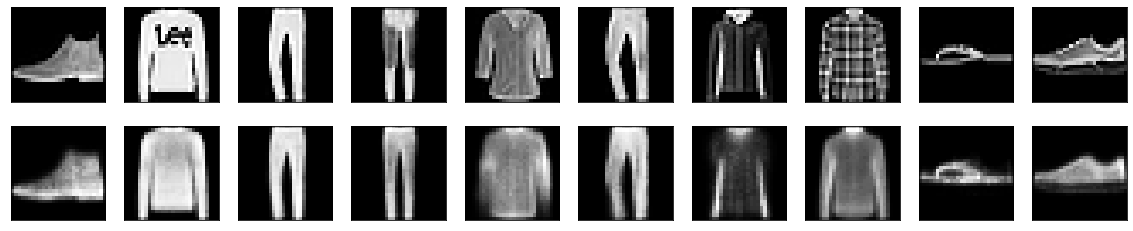

In [23]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [40]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1,28,28,1)
x_validation = x_validation.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape, x_validation.shape, x_test.shape

x_train_noisy = x_train_noisy.reshape(-1,28,28,1)
x_validation_noisy = x_validation_noisy.reshape(-1,28,28,1)
x_test_noisy = x_test_noisy.reshape(-1,28,28,1)

x_train_noisy.shape, x_validation_noisy.shape, x_test_noisy.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [41]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 32)        0  

In [42]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 41s 2s/step - loss: 0.6243 - val_loss: 0.3979
Epoch 2/30
24/24 [==============================] - 38s 2s/step - loss: 0.3767 - val_loss: 0.3377
Epoch 3/30
24/24 [==============================] - 36s 2s/step - loss: 0.3331 - val_loss: 0.3225
Epoch 4/30
24/24 [==============================] - 38s 2s/step - loss: 0.3202 - val_loss: 0.3145
Epoch 5/30
24/24 [==============================] - 43s 2s/step - loss: 0.3131 - val_loss: 0.3106
Epoch 6/30
24/24 [==============================] - 36s 1s/step - loss: 0.3102 - val_loss: 0.3084
Epoch 7/30
24/24 [==============================] - 37s 2s/step - loss: 0.3086 - val_loss: 0.3070
Epoch 8/30
24/24 [==============================] - 36s 2s/step - loss: 0.3074 - val_loss: 0.3059
Epoch 9/30
24/24 [==============================] - 36s 1s/step - loss: 0.3051 - val_loss: 0.3045
Epoch 10/30
24/24 [==============================] - 36s 1s/step - loss: 0.3040 - val_loss: 0.3032
Epoch 11/30
24/24 [

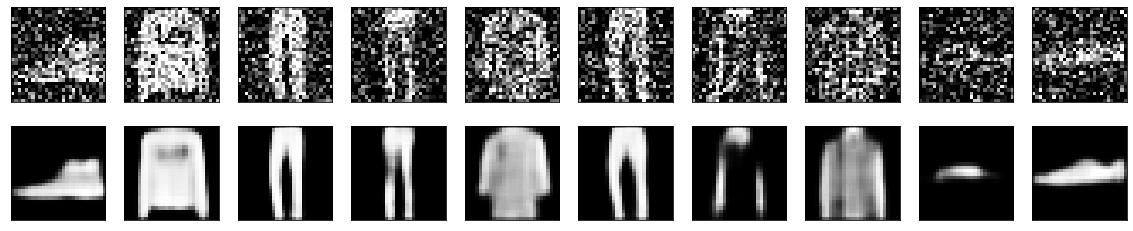

In [43]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()